In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc, precision_score, recall_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler

### Lectura del dataset

In [2]:
data = pd.read_csv('./spotify.csv', sep="\t")
data.shape

(4431, 19)

In [3]:
data.head(5)

,genre,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,valence,tempo,time_signature,acousticness,track_popularity,duration_s,album_release_year
0,Jazz,Miles Davis,Rubberband,Rubberband of Life (feat. Ledisi),2cKH6blsLnE8oEEmAu34YB,0.721,0.698,1,-5.791,1,0.0677,0.002500,0.795,90.354,4,0.0395,5.0,344.0,2019.0
1,Jazz,Miles Davis,Rubberband,So Emotional (feat. Lalah Hathaway),5BiSZV6Yy8K9pv7O1ZTgQm,0.685,0.649,0,-5.838,1,0.0393,0.000000,0.304,129.922,4,0.4250,4.3,318.0,2019.0
2,Jazz,Miles Davis,Kind Of Blue (Legacy Edition),Stella By Starlight,4zxd4tiXPlWMqoJltbVTbE,0.485,0.144,10,-12.824,1,0.0362,0.000114,0.246,86.143,4,0.9120,5.7,285.0,1959.0
3,Jazz,Miles Davis,'Round About Midnight,'Round Midnight,5vb7At47uO0yPGfmYnAHuw,0.495,0.182,10,-11.116,0,0.0467,0.000368,0.203,112.890,4,0.7900,5.6,355.0,1957.0
4,Jazz,Miles Davis,Milestones,Milestones,1xicvSO4CJ2ymqYgpk7DFh,0.553,0.546,9,-7.459,0,0.0341,0.000514,0.700,118.215,4,0.4420,5.6,342.0,1958.0


In [4]:
data.drop(columns=['artist', 'album', 'track_name', 'track_id', 'key', 'time_signature','track_popularity', 'duration_s', 'album_release_year'], inplace=True)

In [5]:
data.columns

Index(['genre', 'danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'valence', 'tempo', 'acousticness'],
      dtype='object')

In [6]:
data["genre"].value_counts()

Jazz           980
Punk Rock      935
Pop            862
Heavy Metal    840
Rock n Roll    814
Name: genre, dtype: int64

In [7]:
data["genre"].value_counts(normalize=True)

Jazz           0.221169
Punk Rock      0.211013
Pop            0.194538
Heavy Metal    0.189573
Rock n Roll    0.183706
Name: genre, dtype: float64

In [8]:
mask_underground = data["genre"] == "Punk Rock"
data.drop(index=data[mask_underground].index, inplace=True)

In [9]:
data.corr()

,danceability,energy,loudness,mode,speechiness,instrumentalness,valence,tempo,acousticness
danceability,1.000000,-0.030228,0.159990,0.005987,-0.027311,-0.205189,0.524255,-0.115349,0.018695
energy,-0.030228,1.000000,0.769430,-0.052908,0.274440,-0.259068,0.195548,0.237434,-0.767104
loudness,0.159990,0.769430,1.000000,-0.046370,0.169321,-0.412956,0.170680,0.179118,-0.612590
mode,0.005987,-0.052908,-0.046370,1.000000,-0.019805,-0.020622,0.043810,-0.019814,0.090040
speechiness,-0.027311,0.274440,0.169321,-0.019805,1.000000,-0.037686,-0.011869,0.136735,-0.195784
instrumentalness,-0.205189,-0.259068,-0.412956,-0.020622,-0.037686,1.000000,-0.201090,-0.053288,0.255643
valence,0.524255,0.195548,0.170680,0.043810,-0.011869,-0.201090,1.000000,0.126826,0.005233
tempo,-0.115349,0.237434,0.179118,-0.019814,0.136735,-0.053288,0.126826,1.000000,-0.180562
acousticness,0.018695,-0.767104,-0.612590,0.090040,-0.195784,0.255643,0.005233,-0.180562,1.000000


<AxesSubplot:>

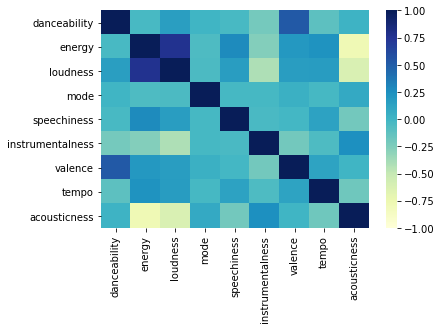

In [10]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu")

In [11]:
data.shape

(3496, 10)

### Features, Variable Target y Normalización

In [12]:
X = data.drop(columns=["genre"])
y = data["genre"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=data["genre"], random_state = 0)

In [14]:
X_train

,danceability,energy,loudness,mode,speechiness,instrumentalness,valence,tempo,acousticness
2508,0.334,0.9180,-2.763,1,0.1050,0.006760,0.544,144.101,0.181000
1901,0.379,0.7260,-4.935,0,0.0332,0.002660,0.178,120.012,0.000193
1374,0.481,0.2850,-10.848,1,0.0424,0.000000,0.316,130.029,0.900000
242,0.674,0.1400,-14.619,0,0.0462,0.000200,0.577,100.763,0.848000
2270,0.304,0.8450,-5.632,1,0.0788,0.001060,0.438,90.374,0.189000
...,...,...,...,...,...,...,...,...,...
389,0.415,0.5280,-8.312,1,0.0540,0.000000,0.455,88.649,0.421000
704,0.729,0.1770,-13.707,1,0.0404,0.000105,0.563,89.909,0.953000
1992,0.325,0.9850,-3.941,1,0.1510,0.107000,0.221,125.307,0.001770
609,0.380,0.0377,-22.733,0,0.0424,0.935000,0.114,75.286,0.984000


In [15]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

### Función para evaluar modelos

In [16]:
def evaluate_model(model,X,y_true):
    '''
    Calcula las métricas ppales para evaluar un clasificador
    Toma como imput el modelo entrenado, el dataset de testeo y sus etiquetas
    '''
    y_pred=model.predict(X)
    y_proba=model.predict_proba(X)

    print(classification_report(y_true,y_pred))
    print('Area bajo la curva ROC:',np.round(roc_auc_score(y_true, y_proba, multi_class="ovo"),4))
    plot_confusion_matrix(model,X,y_true,cmap='Blues');
    return

----------------------------------

# 1. Regresion Logistica

In [17]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_std, y_train)

LogisticRegression(max_iter=1000)

In [18]:
y_pred=lr.predict(X_test_std)
y_proba=lr.predict_proba(X_test_std)

In [19]:
accuracy_score(y_train, lr.predict(X_train_std))

0.8005339435545386

              precision    recall  f1-score   support

 Heavy Metal       0.85      0.89      0.87       210
        Jazz       0.75      0.74      0.74       245
         Pop       0.85      0.88      0.86       216
 Rock n Roll       0.71      0.66      0.68       203

    accuracy                           0.79       874
   macro avg       0.79      0.79      0.79       874
weighted avg       0.79      0.79      0.79       874

Area bajo la curva ROC: 0.9402


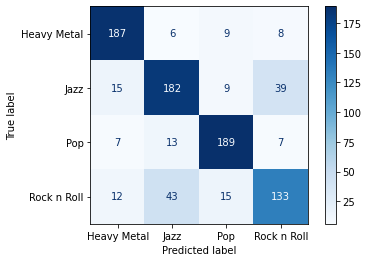

In [20]:
evaluate_model(lr, X_test_std, y_test)

#### 1.2 GridSearch

In [21]:
param_grid_lr = {'C': [1, 10, 100, 1000, 10000, 100000],
     'penalty': ["l2"],
     'solver': ['saga', "lbfgs"]}

In [22]:
folds = StratifiedKFold(n_splits=5, random_state=19, shuffle=True)

In [23]:
grid_lr = GridSearchCV(lr, param_grid_lr, cv=folds, scoring='accuracy', n_jobs=-2)

In [24]:
lr_fiteado = grid_lr.fit(X_train_std, y_train)

In [25]:
grid_lr.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'saga'}

In [26]:
grid_lr.best_score_

0.7948142493638677

              precision    recall  f1-score   support

 Heavy Metal       0.85      0.89      0.87       210
        Jazz       0.75      0.74      0.74       245
         Pop       0.85      0.88      0.86       216
 Rock n Roll       0.71      0.66      0.68       203

    accuracy                           0.79       874
   macro avg       0.79      0.79      0.79       874
weighted avg       0.79      0.79      0.79       874

Area bajo la curva ROC: 0.9402


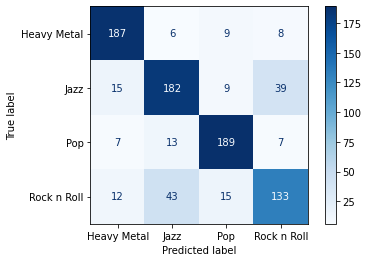

In [27]:
evaluate_model(grid_lr, X_test_std, y_test)

----------------------------------

# 2. Naive Bayes

#### 2.1. Sin normalización

In [28]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [29]:
y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)
print("Accuracy test sin normalizar", accuracy_score(y_test, y_pred))
print("Accuracy train sin normalizar", accuracy_score(y_train, y_pred_train))

Accuracy test sin normalizar 0.7013729977116705
Accuracy train sin normalizar 0.7219679633867276


#### 2.2. Con normalización

In [30]:
gnb_std = GaussianNB()
gnb_std.fit(X_train_std, y_train)

GaussianNB()

In [31]:
y_pred_train_std = gnb_std.predict(X_train_std)
print("Accuracy train con normalización", accuracy_score(y_train, y_pred_train_std))

Accuracy train con normalización 0.7219679633867276


              precision    recall  f1-score   support

 Heavy Metal       0.88      0.75      0.81       210
        Jazz       0.68      0.75      0.72       245
         Pop       0.63      0.83      0.72       216
 Rock n Roll       0.65      0.45      0.53       203

    accuracy                           0.70       874
   macro avg       0.71      0.70      0.69       874
weighted avg       0.71      0.70      0.70       874

Area bajo la curva ROC: 0.9004


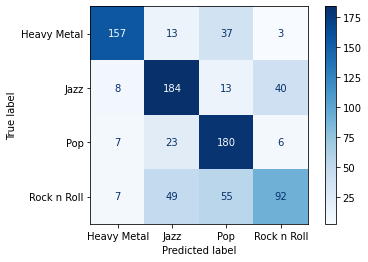

In [32]:
evaluate_model(gnb_std, X_test_std, y_test)

----------------------------------

# 3. Árboles

#### 3.1. Sin normalización

In [33]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(random_state=40)

In [34]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [35]:
y_train_pred_tree = clftree.predict(X_train)
y_test_pred_tree = clftree.predict(X_test)

In [36]:
accuracy_score(y_train, y_train_pred_tree)

1.0

              precision    recall  f1-score   support

 Heavy Metal       0.84      0.82      0.83       210
        Jazz       0.69      0.74      0.72       245
         Pop       0.77      0.77      0.77       216
 Rock n Roll       0.67      0.63      0.65       203

    accuracy                           0.74       874
   macro avg       0.74      0.74      0.74       874
weighted avg       0.74      0.74      0.74       874

Area bajo la curva ROC: 0.8276


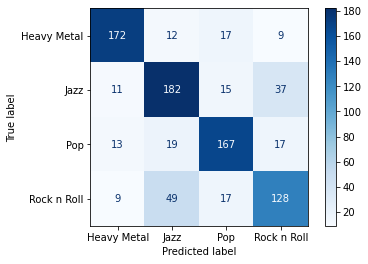

In [37]:
evaluate_model(clftree, X_test, y_test)

#### 3.2. Con normalización

In [38]:
clftree_std = tree.DecisionTreeClassifier(random_state=40)

In [39]:
clftree_std.fit(X_train_std, y_train)

DecisionTreeClassifier(random_state=40)

In [40]:
y_train_pred_tree_std = clftree_std.predict(X_train_std)
y_test_pred_tree_std = clftree_std.predict(X_test_std)

In [41]:
accuracy_score(y_train, y_train_pred_tree_std)

1.0

              precision    recall  f1-score   support

 Heavy Metal       0.86      0.82      0.84       210
        Jazz       0.69      0.73      0.71       245
         Pop       0.77      0.76      0.77       216
 Rock n Roll       0.65      0.64      0.64       203

    accuracy                           0.74       874
   macro avg       0.74      0.74      0.74       874
weighted avg       0.74      0.74      0.74       874

Area bajo la curva ROC: 0.8248


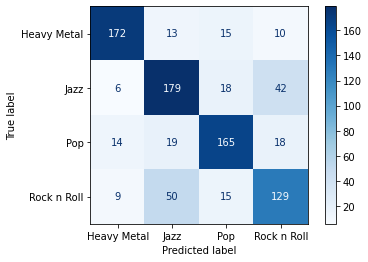

In [42]:
evaluate_model(clftree_std, X_test_std, y_test)

#### 3.3. GridSearch

In [43]:
params_grid = { "criterion" : ["gini", "entropy"],
                "min_samples_leaf": [5,10,15,20,None], 
                "max_depth" : [1,2,3,4,5,6,8,9,10,11,12,13,14,None],
                "min_samples_split": [2, 3, 4,None]}

In [44]:
grid_search = GridSearchCV(clftree, params_grid,
                           n_jobs=-2, scoring='accuracy')

In [45]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=40), n_jobs=-2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13,
                                       14, None],
                         'min_samples_leaf': [5, 10, 15, 20, None],
                         'min_samples_split': [2, 3, 4, None]},
             scoring='accuracy')

In [46]:
#Score durante el entrenamiento.
grid_search.best_score_

0.765069429298437

In [47]:
grid_search.best_params_ 

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 20,
 'min_samples_split': 2}

In [48]:
cv_clf = grid_search.best_estimator_

In [49]:
cv_clf

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=20,
                       random_state=40)

              precision    recall  f1-score   support

 Heavy Metal       0.85      0.86      0.86       210
        Jazz       0.72      0.75      0.73       245
         Pop       0.80      0.75      0.77       216
 Rock n Roll       0.66      0.67      0.66       203

    accuracy                           0.76       874
   macro avg       0.76      0.76      0.76       874
weighted avg       0.76      0.76      0.76       874

Area bajo la curva ROC: 0.9215


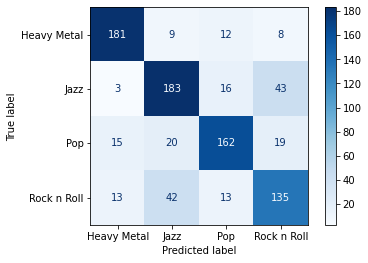

In [50]:
evaluate_model(cv_clf, X_test, y_test)

----------------------------------

# 4. Clustering

In [51]:
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(X_train_std)
PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2'] )
principal_component1 = PCA_dataset1['component1']
principal_component2 = PCA_dataset1['component2']

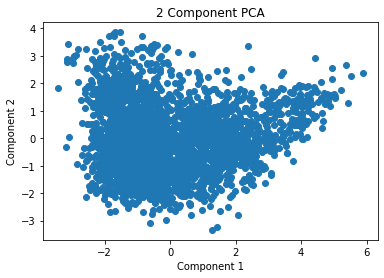

In [52]:
plt.figure()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2']) #c = y_kmeans, s=10)

In [53]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(principalComponents1)
labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides*

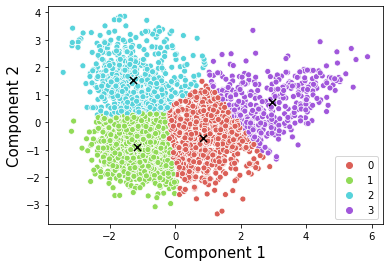

In [54]:
sns.scatterplot(x=principal_component1,y=principal_component2,hue=labels,legend='full',palette=sns.color_palette("hls", 4));
plt.xlabel('Component 1',fontsize=15);plt.ylabel('Component 2',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

In [55]:
data.columns

Index(['genre', 'danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'valence', 'tempo', 'acousticness'],
      dtype='object')

In [56]:
data_clustering = data[['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'valence', 'tempo', 'acousticness']]

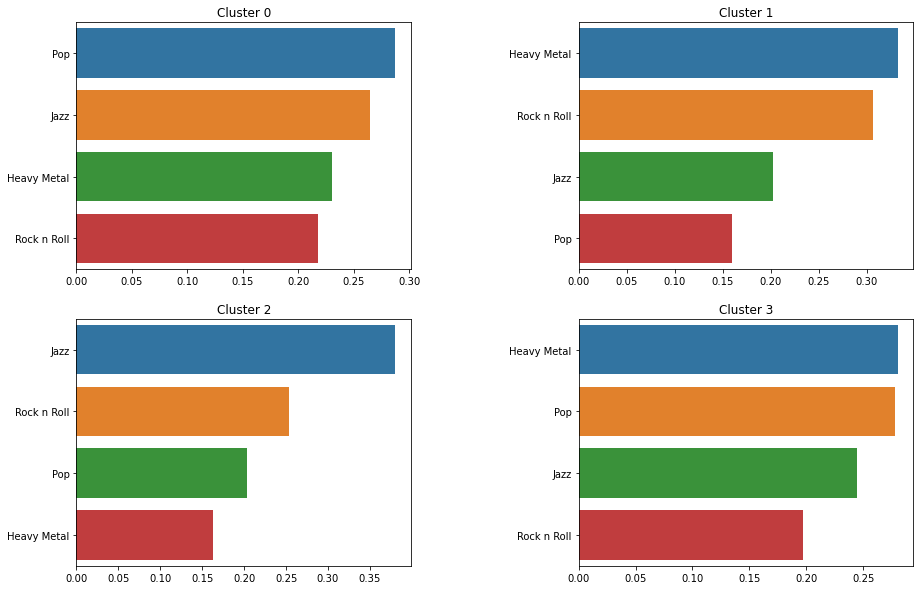

In [57]:
k=4;
km=KMeans(n_clusters=k, init = 'k-means++', random_state=0)
km.fit(X)

data_filtered=data.loc[data_clustering.index];
f,ax=plt.subplots(2,2,figsize=(15,10),gridspec_kw={'wspace':0.5})
ax=ax.ravel();
for lbl in range(k):
    S=data_filtered.loc[km.labels_==lbl,'genre'].value_counts(normalize=True);
    chart=sns.barplot(y=S.index[:10],x=S.values[:10],ax=ax[lbl],orient='h')
    chart.set_title('Cluster '+str(lbl))

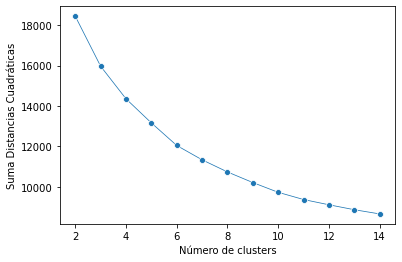

In [58]:
sq_distances=[]
k_values=range(2,15);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_train_std)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');

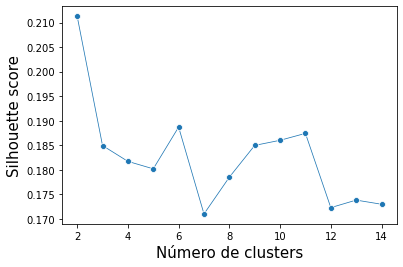

In [59]:
from sklearn.metrics import silhouette_score,silhouette_samples

sil=[]
k_values=range(2,15);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=15,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_train_std)
    score=silhouette_score(X_train_std,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

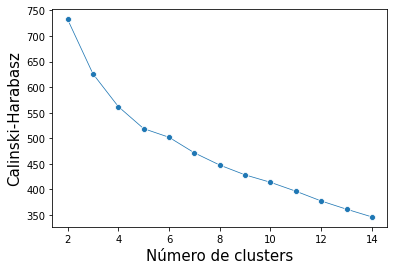

In [60]:
from sklearn.metrics import calinski_harabasz_score

k_values=range(2,15);
ch_scores=[]

for k in k_values:
    
    kmeans=KMeans(n_clusters=k,n_init=15,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_train_std)
    score=calinski_harabasz_score(X_train_std,kmeans.labels_)
    ch_scores.append(score)

sns.lineplot(x=k_values,y=ch_scores,marker='o',size=30,legend=False);
plt.ylabel('Calinski-Harabasz',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);
